- scikit에서 pickling으로 모델 저장
- pickling은 load하는데 오래 걸림.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier()

In [2]:
import pickle
with open('knn.pk','wb') as f:
    pickle.dump(knn,f)

del knn

In [4]:
with open('knn.pk','rb') as f:
    knn = pickle.load(f)
knn.predict([[3,3,3,3]])

array([1])

- json이 더 효율적

#### joblib

- vertorization이 느린 편
- joblib은 numpy에 최적화된 multi-processing 지원

In [6]:
import joblib
joblib.dump(knn,'knn.pk')

['knn.pk']

In [8]:
knn2 = joblib.load('knn.pk')
knn2.predict([[3,3,2,3]])

array([1])

In [9]:
dir(joblib)
# numpy 저장하는데 효율적
# parrellel : 동시 실행

['Logger',
 'MemorizedResult',
 'Memory',
 'Parallel',
 'PrintTime',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_memmapping_reducer',
 '_memory_helpers',
 '_multiprocessing_helpers',
 '_parallel_backends',
 '_store_backends',
 'backports',
 'compressor',
 'cpu_count',
 'delayed',
 'disk',
 'dump',
 'effective_n_jobs',
 'executor',
 'externals',
 'format_stack',
 'func_inspect',
 'hash',
 'hashing',
 'load',
 'logger',
 'memory',
 'my_exceptions',
 'numpy_pickle',
 'numpy_pickle_compat',
 'numpy_pickle_utils',
 'parallel',
 'parallel_backend',
 'pool',
 'register_compressor',
 'register_parallel_backend',
 'register_store_backend',
 'wrap_non_picklable_objects']

## paraell

- n_jobs : scikit에서 numpy의 성능을 높이기 위한 도구(cross_val_score이나 보통 CV붙어있는거 다 됨), cpu 자원의 개수
- **delayed : 연기를 시켜서 cpu를 하나씩 받음**
    - 합성함수 방식 ()()
    - functional paradigm에서 동시에 넣을 때 사용

In [26]:
from joblib import Parallel, delayed
# Parallel(-1)()  # instance의 instance

In [12]:
# dir(Parallel(-1))  # __call__ : callable

In [20]:
def task(i):
    sum_ = 0
    for j in range(i):
        sum_+=j
    return sum_

In [23]:
%timeit Parallel(-1)(delayed(task)(i) for i in [100000,200000,300000])

14.7 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%%timeit
for i in [100000,200000,300000]:
    task(i)

24.7 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


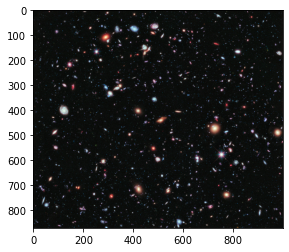

In [27]:
from skimage.util import view_as_windows
from skimage.data import hubble_deep_field
import matplotlib.pyplot as plt
data = hubble_deep_field()
plt.imshow(data)

In [29]:
# 처리해보기(nosie 제거)
from skimage.restoration import denoise_tv_chambolle
data2 = denoise_tv_chambolle(data, weight=0.1, multichannel=True)
# 속도가 오래 걸림

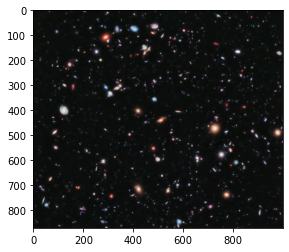

In [30]:
plt.imshow(data2)

In [31]:
# @delayed 데코레이터 사용 가능
def task(data):
    return denoise_tv_chambolle(data, weight=0.1, multichannel=True)

pics = view_as_windows(data, (10,data.shape[1],data.shape[2]), step = 10)

In [32]:
%timeit Parallel(-1)(delayed(task)(i) for i in pics)  # cpu 최대개수

3.55 s ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**functional paradigm**

In [47]:
def visualize_image(img,ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x), verticalalignment = 'center',
                 horizontalalignment = 'center', color='white' if img[x][y] < thresh else 'black')

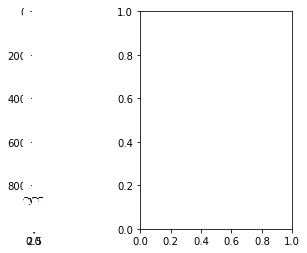

In [53]:
fig, ax = plt.subplots(1,2)
visualize_image(data2[0],ax[0])

In [41]:
import tensorflow as tf
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

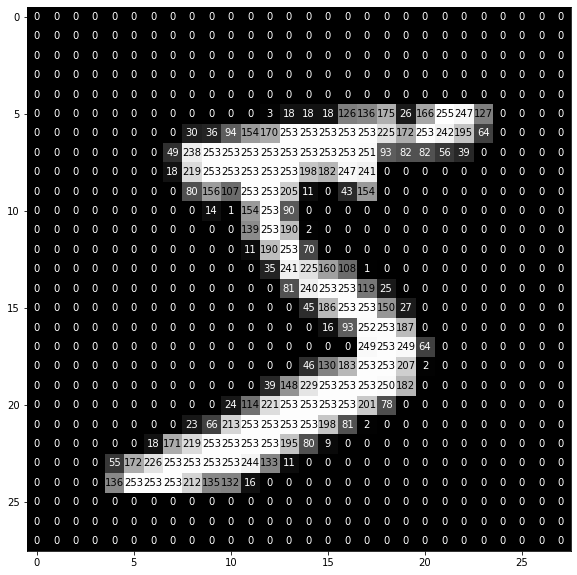

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
visualize_image(X_train[0], ax)

In [40]:
# decorate 이용
@delayed
def task(data):
    return denoise_tv_chambolle(data, weight=0.1, multichannel=True)

### matplotlib

- fig : 가상의 그림 공간

- axe : 안에 실제로 들어가는 내용(그래프를 의미함)

- state machine : 

Text(0.5, 1.0, 'bbb')

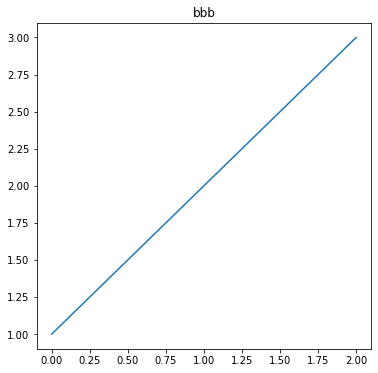

In [56]:
plt.figure(figsize = (6,6))
plt.axes()
plt.plot([1,2,3])
plt.title('bbb')

Text(0.5, 1.0, 'bbb')

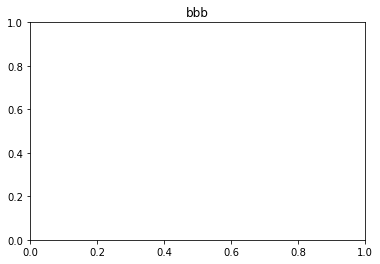

In [57]:
plt.title('bbb') # 윗단계 있는거 자동 생성

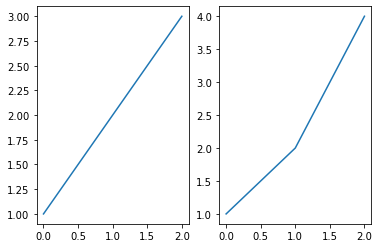

In [60]:
plt.subplot(1,2,1)
plt.plot([1,2,3])
plt.subplot(1,2,2)
plt.plot([1,2,4])

## s붙으면 객체지향 방식처럼 쓴다.

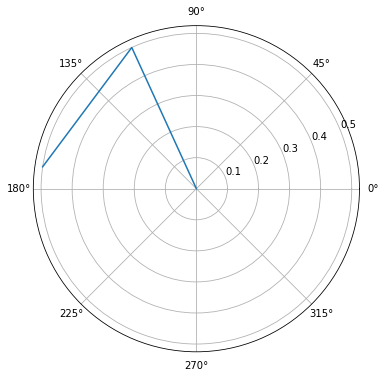

In [61]:
plt.figure(figsize=(6,6))
plt.polar((0,0,0.5,0.5))

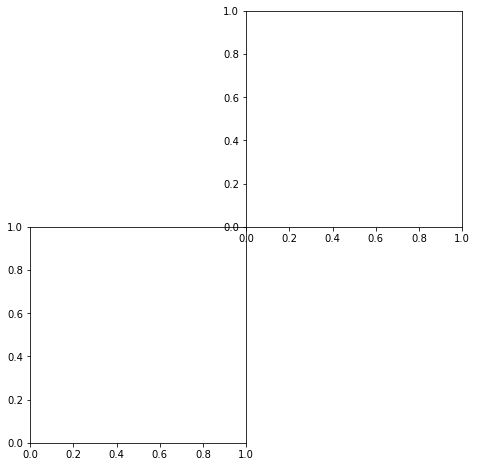

In [63]:
plt.figure(figsize=(6,6))
plt.axes((0,0,0.5,0.5))
plt.axes((0.5,0.5,0.5,0.5))

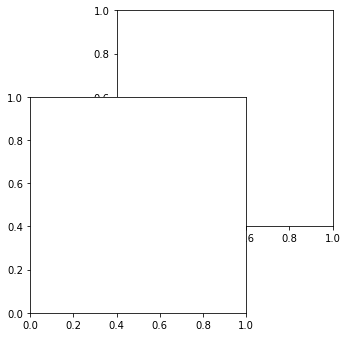

In [64]:
plt.figure(figsize=(6,6))
plt.axes((0.7,0.7,0.5,0.5))
plt.axes((0.5,0.5,0.5,0.5))

<AxesSubplot:>

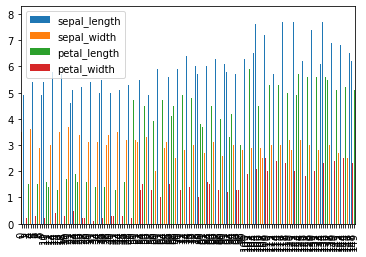

In [70]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.plot.bar()

## Convolution

- Element wise 곱해서 더해서 계산 -> **이거는 사실 correlation 연산임**
- **convolution은 좌우 반전, 상하 반전을 하고 나서 correlation연산을 하는 것**
- 딥러닝에서 CNN에서는 convolution 연산을 하지 않음(반전x) - > 연산량 줄이기 위해서
- filtering 기법을 쓸 때는 상하좌우 반전을 해야함!
    - filtering : 이미지 특수효과


참고 : https://tensorflow.blog/tag/convolution/


</br>

## Padding

- 영상의 filtering에서 사용할 때 -> 크기가 같았으면
- 가장자리의 값을 잘 뽑지 못하는 문제점 -> **가장자리를 0으로 채워줌**

In [74]:
import numpy as np
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [75]:
import cv2
img = cv2.imread('1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_img)

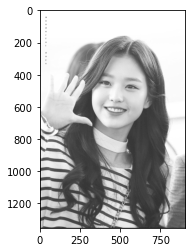

In [77]:
output = np.zeros_like(gray_img)
paded_img = np.zeros((gray_img.shape[0] + kernel.shape[0]-1,gray_img.shape[1] + kernel.shape[1]-1))
paded_img[1:-1,1:-1] = gray_img
plt.imshow(paded_img,cmap='gray')

#### convolution 연산하기(kernel 반전)

In [78]:
conv_kernel = np.flipud(np.fliplr(kernel))

In [83]:
for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x] = (conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum()

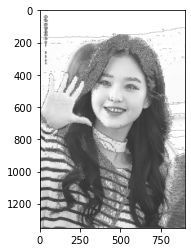

In [84]:
plt.imshow(output, cmap='gray')

다른 kernel

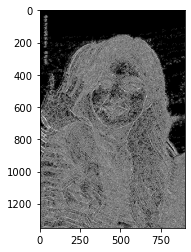

In [87]:
kernel = np.array([[-1,0,1],[0,0,0],[1,0,-1]])  # edge detection
output = np.zeros_like(gray_img)
paded_img = np.zeros((gray_img.shape[0] + kernel.shape[0]-1,gray_img.shape[1] + kernel.shape[1]-1))
paded_img[1:-1,1:-1] = gray_img
conv_kernel = np.flipud(np.fliplr(kernel))
for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x] = (conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum()

plt.imshow(output, cmap='gray')

- 도메인 이동 간의 보간이 안되서 반전을 한다.

- 보통 주파수 영역에서 다른 영역으로 변화하는 것을 줄이기 위해서

</br>

#### 반전하지 않았을 때

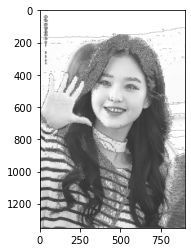

In [89]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # edge detection
output = np.zeros_like(gray_img)
paded_img = np.zeros((gray_img.shape[0] + kernel.shape[0]-1,gray_img.shape[1] + kernel.shape[1]-1))
paded_img[1:-1,1:-1] = gray_img
conv_kernel = kernel
for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x] = (conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum()

plt.imshow(output, cmap='gray')

In [92]:
# convolution

input_shape = (2,6,6,3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2,3,activation='relu',input_shape = input_shape[1:])
y(x)

<tf.Tensor: shape=(2, 4, 4, 2), dtype=float32, numpy=
array([[[[0.        , 0.        ],
         [0.47577858, 0.6240692 ],
         [0.        , 0.47350362],
         [0.        , 1.439023  ]],

        [[0.        , 2.3662066 ],
         [0.456411  , 0.        ],
         [0.2960247 , 1.1400043 ],
         [0.13842571, 0.        ]],

        [[1.5881327 , 0.        ],
         [1.8985167 , 0.        ],
         [2.0531917 , 0.1863216 ],
         [0.08491394, 0.        ]],

        [[2.4688003 , 0.        ],
         [0.        , 0.07814976],
         [2.2764893 , 0.1298297 ],
         [0.        , 0.59781605]]],


       [[[0.        , 1.3796293 ],
         [0.        , 0.68435323],
         [0.        , 0.11942874],
         [0.        , 2.0572777 ]],

        [[0.8779972 , 1.1426555 ],
         [0.18576966, 1.9910553 ],
         [0.        , 1.1070458 ],
         [0.        , 0.        ]],

        [[0.        , 0.43175244],
         [0.        , 1.5746572 ],
         [0.        , 

In [93]:
y.kernel

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 2) dtype=float32, numpy=
array([[[[ 0.2920668 , -0.24953365],
         [-0.28735536, -0.01269072],
         [ 0.32010067, -0.26731667]],

        [[ 0.2962066 , -0.27884996],
         [-0.1092107 ,  0.26590836],
         [-0.16761272,  0.25484622]],

        [[-0.02997491, -0.31915694],
         [-0.20900235, -0.20447627],
         [ 0.31221962,  0.20590836]]],


       [[[-0.11804581, -0.02123228],
         [-0.04788974,  0.12660387],
         [-0.05230036,  0.20850837]],

        [[ 0.21478909, -0.04935205],
         [-0.04728243,  0.24310857],
         [-0.30994913,  0.20752746]],

        [[-0.19756882, -0.2113475 ],
         [ 0.2790376 , -0.27401805],
         [ 0.01298961,  0.11175281]]],


       [[[-0.08641043,  0.10675237],
         [-0.28541684, -0.28287947],
         [-0.18193927,  0.18939495]],

        [[-0.02039826, -0.1220867 ],
         [-0.03582659,  0.04030365],
         [ 0.08372322, -0.14233834]],

        [[-0.34984

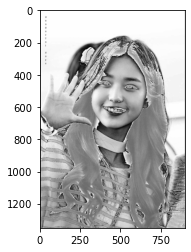

In [97]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/8 # gaussian blur
output = np.zeros_like(gray_img)
paded_img = np.zeros((gray_img.shape[0] + kernel.shape[0]-1,gray_img.shape[1] + kernel.shape[1]-1))
paded_img[1:-1,1:-1] = gray_img
conv_kernel = kernel
for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x] = (conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum()

plt.imshow(output, cmap='gray')

### Opencv filter

In [98]:
cv2.GaussianBlur

<function GaussianBlur>

In [99]:
np.convolve([1,2,3],[4,5,6])  # full
# 상하 반전 못하고 좌우 반전만..?

array([ 4, 13, 28, 27, 18])

In [100]:
np.convolve([1,2,3],[4,5,6],mode='valid') # padding x

array([28])

In [102]:
np.convolve([1,2,3],[4,5,6,7,8,9],mode='same')

array([13, 28, 34, 40, 46, 42])

In [106]:
from scipy import signal
signal.convolve([1,2,3],[4,5,6,7,8,9],mode='same')

array([28, 34, 40])

In [111]:
a = np.random.randint(0,10,9).reshape(3,3)
b = np.random.randint(0,2,25).reshape(5,5)
signal.convolve2d(a,b,mode='valid')

array([[40, 25, 28],
       [31, 30, 17],
       [24, 34, 36]])

In [113]:
ke = np.fliplr(np.flipud(a))
np.sum(ke*b[:3,1:4])  # 0,1의 원소

25